In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# Load the data

from tensorflow.keras.datasets import fashion_mnist

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [4]:
# Explore the data

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [5]:
# check the shape of the data

train_data[0].shape, train_labels[0].shape

((28, 28), ())

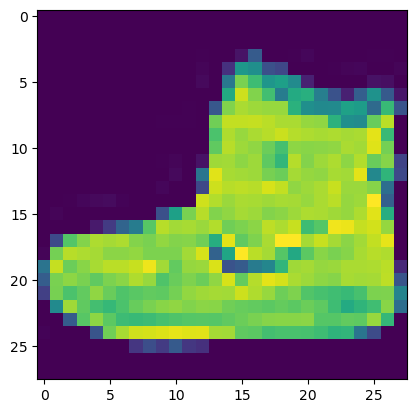

In [5]:
# Plot the data

plt.imshow(train_data[0]);

In [6]:
# Check the labels

train_labels[0]

9

In [7]:
# Create a list of the class names

class_names = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

len(class_names)

10

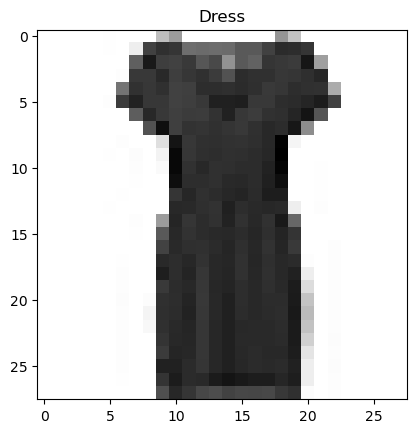

In [8]:
# Plot an example image and it's label

index_of_choice = 20
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]]);

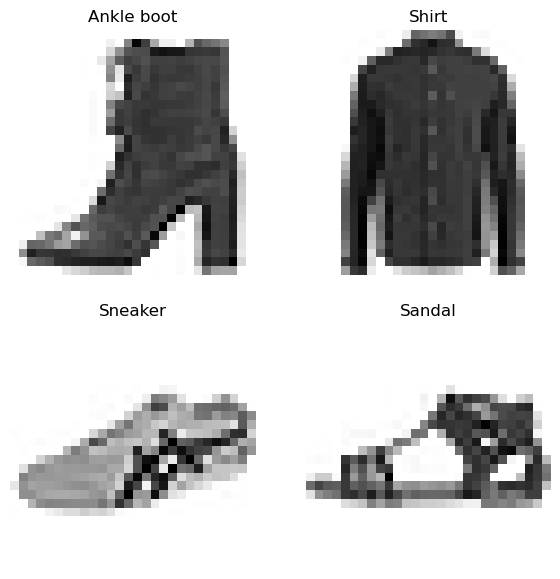

In [9]:
# Plot multiple images of random data

plt.figure(figsize=(7, 7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False);


## Building a multi-class classification model

In [10]:
# input shape

train_data[0].shape

(28, 28)

In [11]:
# output shape

len(class_names)

10

In [6]:
# Set random seed

tf.random.set_seed(42)

In [26]:
# Create the model

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])


In [29]:
# Compile the model

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [30]:
non_norm_history = model.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4339 - accuracy: 0.1218 - val_loss: 2.2089 - val_accuracy: 0.1443
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.0369 - accuracy: 0.1870 - val_loss: 1.7930 - val_accuracy: 0.2340
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7208 - accuracy: 0.2635 - val_loss: 1.6591 - val_accuracy: 0.3207
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5955 - accuracy: 0.3401 - val_loss: 1.5530 - val_accuracy: 0.3798
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5414 - accuracy: 0.3649 - val_loss: 1.5270 - val_accuracy: 0.3595
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3950 - accuracy: 0.4209 - val_loss: 1.4069 - val_accuracy: 0.4098
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3218 - accuracy: 0.4431 - val_loss: 1.3135 - val_accuracy: